In [42]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load JSON data from the file
file_path = './ben_alaya_results.json'

# Open the file and load the content
with open(file_path) as file:
    data = json.load(file)




FileNotFoundError: [Errno 2] No such file or directory: './ben_alaya_results.json'

Analyzing results of Cosmin 


/tmp/ipykernel_737106/1394808927.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_means = df.applymap(np.mean)
/home/malek/miniconda3/envs/nnunet+braincf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/malek/miniconda3/envs/nnunet+braincf/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


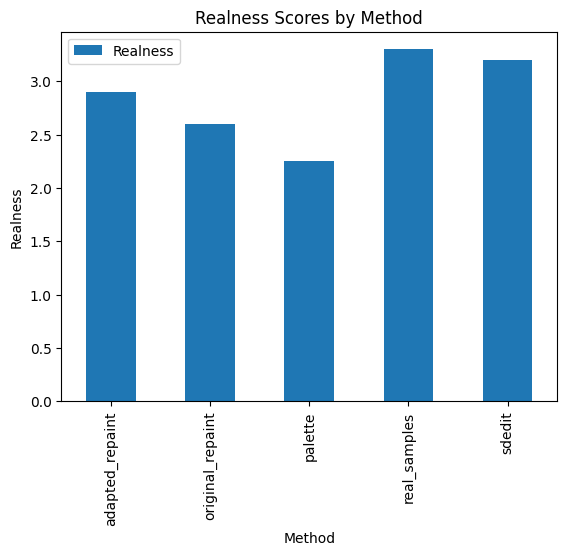

In [38]:
from ast import Dict


method_dict = {'adapted_repaint': {'Realness' :[], 'LocationScale': [],"AlterHealthy":[], "RealisticChanges":[]},
               'original_repaint': {'Realness' :[], 'LocationScale': [],"AlterHealthy":[], "RealisticChanges":[]},
               'palette': {'Realness' :[], 'LocationScale': [],"AlterHealthy":[], "RealisticChanges":[]},
               'real_samples': {'Realness' :[], 'LocationScale': [],"AlterHealthy":[], "RealisticChanges":[]},
               'sdedit': {'Realness' :[], 'LocationScale': [],"AlterHealthy":[], "RealisticChanges":[]}}
for user in data:
    print('Analyzing results of',user['username'])
    # Create a DataFrame from the data
    for response in user['responses']:
        filename = response['Filename']
        method = filename.split('/')[-2]
        #print('Method:',method)
        if 'Realness' in response:
            method_dict[method]['Realness'].append(response['Realness'])
        
        if 'LocationScale' in response:
            method_dict[method]['LocationScale'].append(response['LocationScale'])

        if 'AlterHealthy' in response:
            method_dict[method]['AlterHealthy'].append(response['AlterHealthy'])
        
        if 'RealisticChanges' in response:
            method_dict[method]['RealisticChanges'].append(response['RealisticChanges'])



# Create a DataFrame from the data
df = pd.DataFrame(method_dict)


df = df.transpose()


df_means = df.applymap(np.mean)
df_means

df_realness = df_means[['Realness']]
#df_other_columns = df_means.drop(columns=['Realness'])
df_other_columns = df_means.drop('real_samples')


df_realness
df_realness.plot(kind='bar')
plt.xlabel('Method')
plt.ylabel('Realness')
plt.title('Realness Scores by Method')
plt.show()


In [39]:
df_realness

,Realness
adapted_repaint,2.90
original_repaint,2.60
palette,2.25
real_samples,3.30
sdedit,3.20


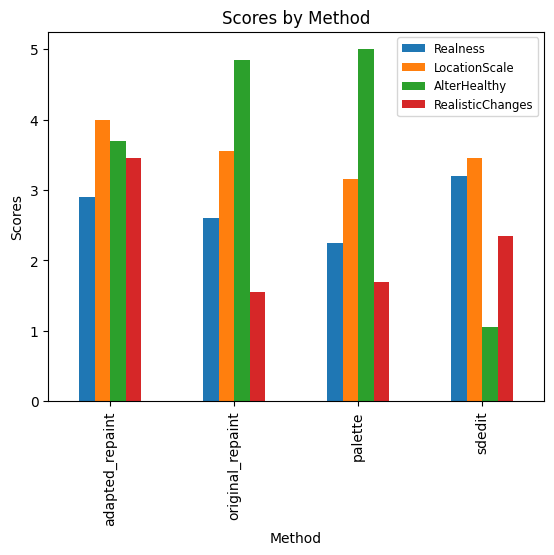

In [41]:
df_other_columns.plot(kind='bar')
plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by Method')
plt.legend(fontsize='small')
plt.show()


In [40]:
df_other_columns

,Realness,LocationScale,AlterHealthy,RealisticChanges
adapted_repaint,2.90,4.00,3.70,3.45
original_repaint,2.60,3.55,4.85,1.55
palette,2.25,3.15,5.00,1.70
sdedit,3.20,3.45,1.05,2.35
